1. PCA算法成立的条件与数据分布的形式是否有关系？尝试计算下列特殊数据分布的第一个主成分，和你直观的感受一样吗？
   - 直线$y=x$上的点$\{(k,k)|k=1,...,10\}$；
   - 两边不等长的十字形$\{(x,0)|x=-3,...,3\}\cup \{(0,y)|y=-2,...,2\}$；
   - 三维中单位立方体的8个顶点$\{(x,y,z)|x,y,z=0,1\}$。

答：PCA算法是通过寻找数据主要的方差方向进行降维。PCA算法成立的条件是数据在某县方向上存在显著的方差，能找到线性关系。因此PCA算法成立的条件与数据分布的形式是存在一定的关系的，如果数据分布没有明显地集中在某个方向，PCA算法就难以找到合适的成分对该数据进行描述。  
对于给出的三个数据：
- data1：第一主成分在 $y=x$ 方向
- data2：第一主成分在 $x$ 轴方向（x轴方向数据点比较多
- data3：第一主成分在 $z$ 轴方向
对于前两个数据集，第一主成分是比较容易想象的，但是对于第三个三维的数据集，原以为第一主成分会是在对角线上的，实际是在 $z$ 轴上

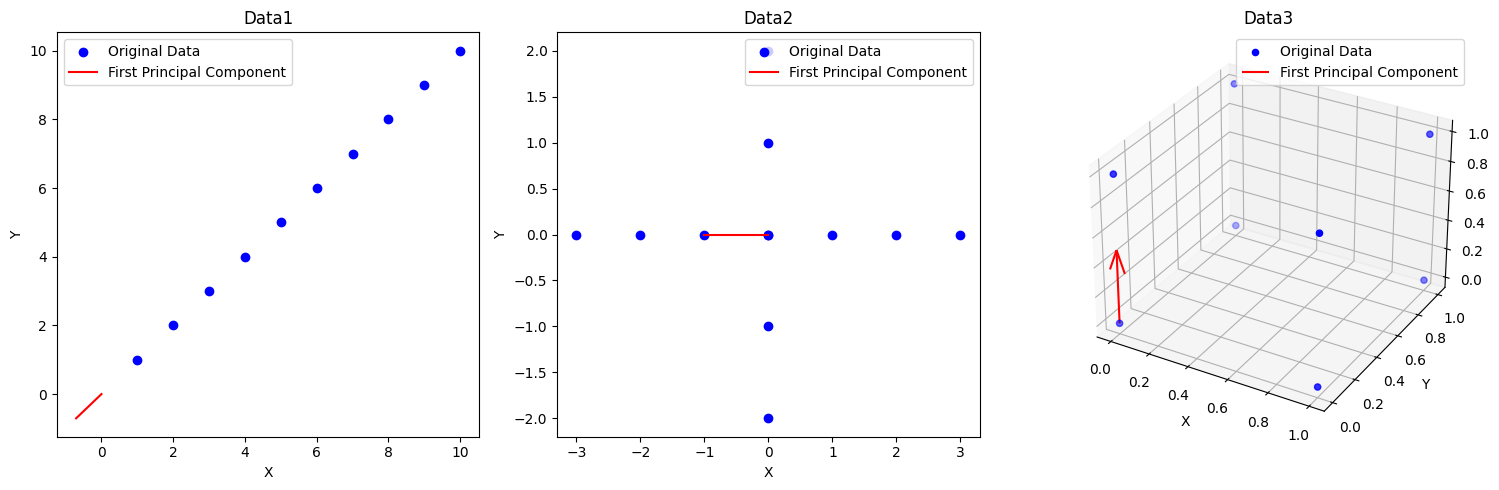

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# data1
data1 = np.array([(k, k) for k in range(1, 11)])
pca1 = PCA(n_components=1)
pca1.fit(data1)
data1_projected = pca1.transform(data1)

# data2
horizontal_line = np.array([(x, 0) for x in range(-3, 4)])
vertical_line = np.array([(0, y) for y in range(-2, 3)])
data2 = np.concatenate((horizontal_line, vertical_line))
pca2 = PCA(n_components=1)
pca2.fit(data2)
data2_projected = pca2.transform(data2)

# data3
data3 = np.array([(x, y, z) for x in range(2) for y in range(2) for z in range(2)])
pca3 = PCA(n_components=1)
pca3.fit(data3)
data3_projected = pca3.transform(data3)

# 可视化
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(data1[:, 0], data1[:, 1], color='blue', label='Original Data')
plt.plot([0, pca1.components_[0, 0]], [0, pca1.components_[0, 1]], color='red', label='First Principal Component')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data1')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(data2[:, 0], data2[:, 1], color='blue', label='Original Data')
plt.plot([0, pca2.components_[0, 0]], [0, pca2.components_[0, 1]], color='red', label='First Principal Component')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data2')
plt.legend()

ax = plt.subplot(1, 3, 3, projection='3d')
ax.scatter(data3[:, 0], data3[:, 1], data3[:, 2], color='blue', label='Original Data')
ax.quiver(0, 0, 0, pca3.components_[0, 0], pca3.components_[0, 1], pca3.components_[0, 2], color='red', label='First Principal Component', length=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Data3')
plt.legend()

plt.tight_layout()
plt.show()


---

2. 当有数据集中包含多个不同类别的数据时，PCA还可以用来把数据区分开，完成类似于聚类的效果。这样做的原理是什么？（提示：考虑主成分与方差的关系。）

答：因为PCA是寻找主要方差方向进行降维的，数据在不同的方差方向会有不同的分布，通过主要的方差方向来确定主成分。而不同的主成分的方向上的方差是不一样的，数据分布会不同，通过不同主成分的不同方差，数据可能降维后会呈现一定的分离效果，实现类似聚类的效果。

---

3.利用sklearn库中的`sklearn.datasets.load_iris()`函数加载鸢尾花数据集。该数据集中共包含3种不同的鸢尾花，每一行代表一朵鸢尾花，并给出了花萼长度、花瓣长度等特征，以及鸢尾花所属的种类。用PCA把其中的特征数据降到两维，画出降维后数据的分布，并为每种鸢尾花涂上不同颜色。不同种的样本是否被分开了？

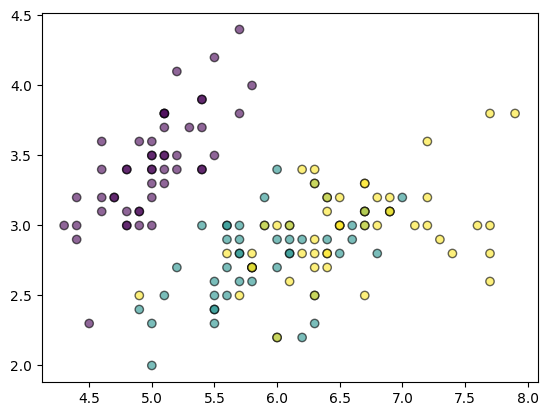

In [54]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', alpha=0.6, cmap='viridis')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


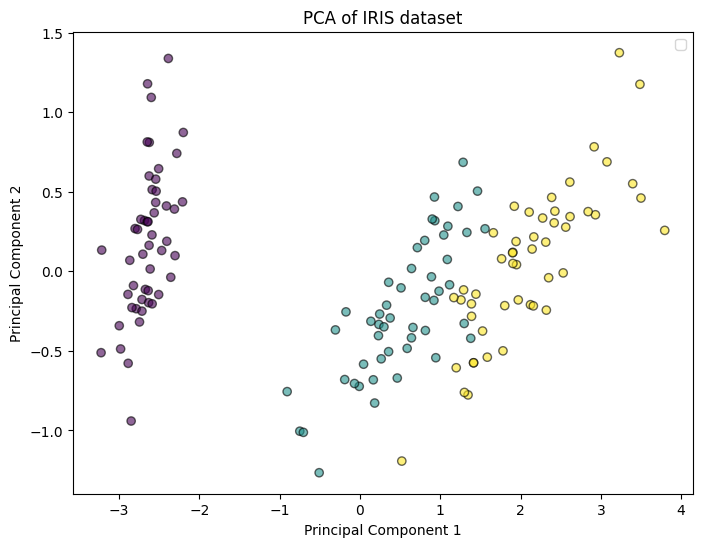

In [55]:
# 使用PCA将数据降到两维
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

# 绘制降维后的数据分布
plt.figure(figsize=(8, 6))
plt.scatter(X_r[:, 0], X_r[:, 1], c=y, edgecolor='k', alpha=0.6, cmap='viridis')

# 添加标题和轴标签
plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# 显示图例
plt.legend()

# 显示图表
plt.show()

d:\miniconda\envs\d2l\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


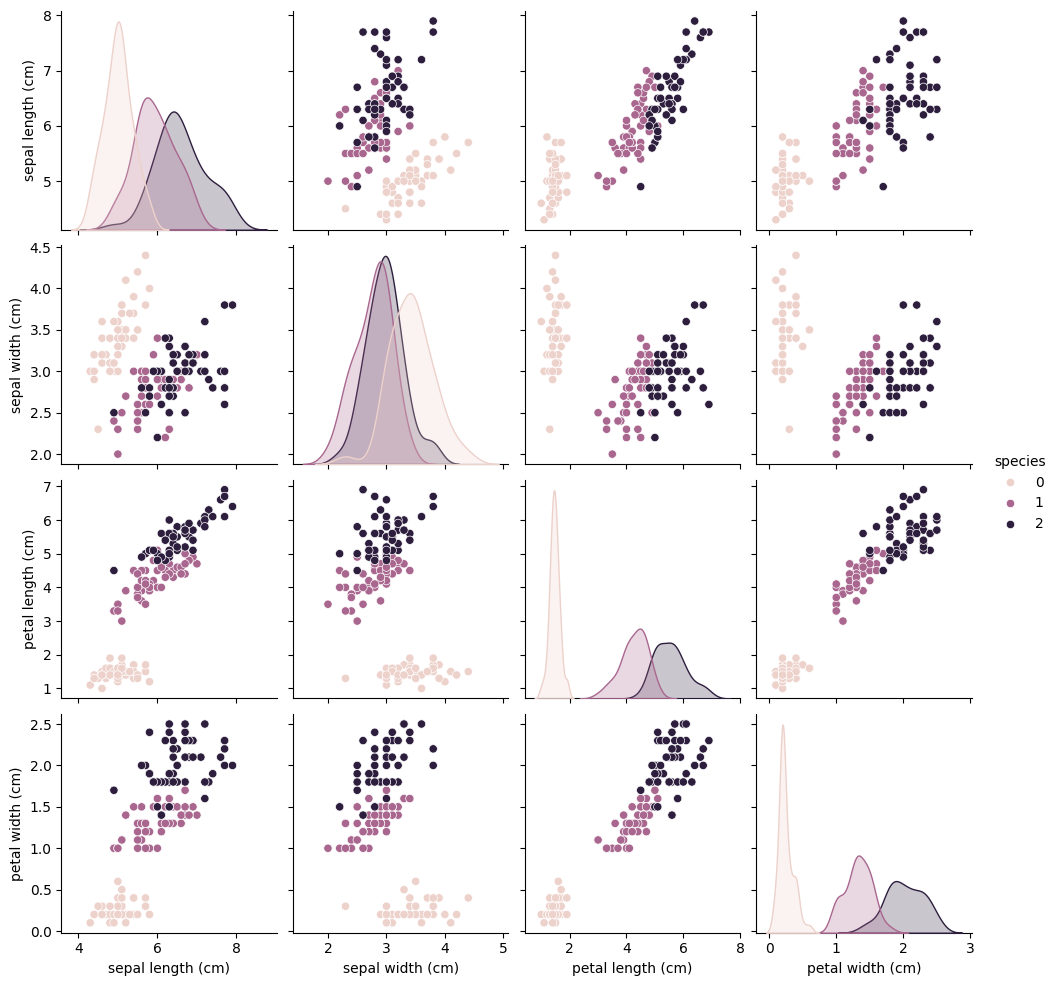

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

# 将数据转换为DataFrame以便于可视化
iris_df = DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = DataFrame(iris.target, columns=['species'])

# 绘制散点图矩阵
sns.pairplot(iris_df, hue='species')
plt.show()